# Email Spam Classification

In [1]:
# Required modules
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from nltk.corpus import stopwords
from collections import Counter
from itertools import chain

## Exploring the Dataset

In [2]:
# Load the dataset
# Source: https://www.kaggle.com/llabhishekll/fraud-email-dataset
df = pd.read_csv("email_spam.zip", compression="zip")
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [3]:
# Check for null values
df.isnull().sum()

Text     1
Class    0
dtype: int64

In [4]:
# Remove the rows with null values
df.dropna(how="any", inplace=True)
df.isnull().sum()

Text     0
Class    0
dtype: int64

In [5]:
# Get basic information about each class
df.groupby("Class").describe()

Text                                                              
      count unique                                               top freq
Class                                                                    
0      6742   5915                                               Fyi  175
1      5186   4334  <html><head><style>P{margin:0px;padding:0px}body   49

In [6]:
# Get a list of stopwords
list_of_stopwords = stopwords.words("english")

# Remove punctuations and stopwords from the messsage
def text_process(text):
    # Remove any punctuations
    no_punc = ''.join(char for char in text if char not in string.punctuation).lower()
    
    # Remove any stopwords
    return [word for word in no_punc.split() if word not in list_of_stopwords]

In [7]:
# Get the most common words in the dataset
Counter(chain(*df["Text"].apply(text_process))).most_common(50)

[('money', 10922),
 ('bank', 8450),
 ('account', 8011),
 ('us', 6624),
 ('business', 4911),
 ('fund', 4592),
 ('next', 4549),
 ('country', 4371),
 ('transaction', 4290),
 ('foreign', 4016),
 ('transfer', 3965),
 ('one', 3844),
 ('want', 3828),
 ('million', 3814),
 ('also', 3789),
 ('contact', 3785),
 ('kin', 3641),
 ('would', 3544),
 ('company', 3399),
 ('security', 3327),
 ('funds', 3233),
 ('sum', 3221),
 ('know', 3209),
 ('email', 3162),
 ('late', 2974),
 ('name', 2906),
 ('please', 2837),
 ('dollars', 2811),
 ('family', 2804),
 ('government', 2773),
 ('mr', 2771),
 ('since', 2625),
 ('united', 2608),
 ('assistance', 2572),
 ('private', 2535),
 ('get', 2449),
 ('information', 2413),
 ('claim', 2374),
 ('died', 2357),
 ('come', 2273),
 ('may', 2248),
 ('need', 2247),
 ('made', 2225),
 ('father', 2162),
 ('help', 2144),
 ('time', 2051),
 ('years', 2035),
 ('shall', 2035),
 ('decided', 2004),
 ('make', 2003)]

## Text Vectorization

In [8]:
# Vectorize the data
cv = CountVectorizer(analyzer=text_process, max_df=0.8)
X = cv.fit_transform(df["Text"])

In [9]:
# Identify the target column
Y = df["Class"]

In [10]:
# Split the data into a train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Logistic Regression

In [11]:
# Use Logistic Regression to make the predictions
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_hat_lr = lr.predict(X_test)

# Compute the accuracy, precision, recall, and F-1 score
results_lr = {
    "Accuracy": accuracy_score(Y_test, Y_hat_lr),
    "Precision": precision_score(Y_test, Y_hat_lr),
    "Recall": recall_score(Y_test, Y_hat_lr),
    "F-1": f1_score(Y_test, Y_hat_lr)
}
results_lr

{'Accuracy': 0.9761106454316848,
 'Precision': 1.0,
 'Recall': 0.9448742746615088,
 'F-1': 0.9716558925907509}

In [12]:
# Generate the confusion matrix
confusion_matrix(Y_test, Y_hat_lr)

array([[1352,    0],
       [  57,  977]], dtype=int64)

## Multinomial Naive-Bayes

In [13]:
# Use Multinomial Naive-Bayes to make the predictions
nb = MultinomialNB()
nb.fit(X_train, Y_train)
Y_hat_nb = nb.predict(X_test)

# Compute the accuracy, precision, recall, and F-1 score
results_nb = {
    "Accuracy": accuracy_score(Y_test, Y_hat_nb),
    "Precision": precision_score(Y_test, Y_hat_nb),
    "Recall": recall_score(Y_test, Y_hat_nb),
    "F-1": f1_score(Y_test, Y_hat_nb)
}
results_nb

{'Accuracy': 0.9652137468566638,
 'Precision': 0.9603097773475314,
 'Recall': 0.9593810444874274,
 'F-1': 0.9598451862602805}

In [14]:
# Generate the confusion matrix
confusion_matrix(Y_test, Y_hat_nb)

array([[1311,   41],
       [  42,  992]], dtype=int64)

## Comparing the Models

In [15]:
# Combine the results from the models into a dataframe
results = pd.DataFrame([results_lr, results_nb], index=["Logistic Regression", "Multinomial Naive-Bayes"])
results

,Accuracy,Precision,Recall,F-1
Logistic Regression,0.976111,1.00000,0.944874,0.971656
Multinomial Naive-Bayes,0.965214,0.96031,0.959381,0.959845


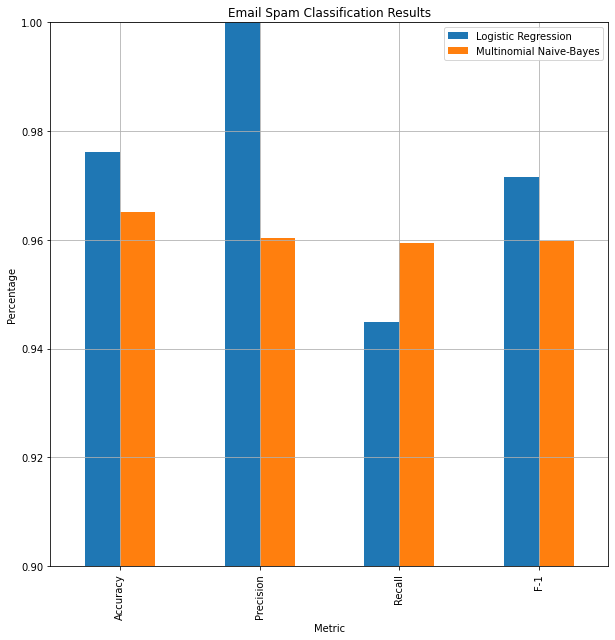

In [16]:
# Visualize the results
results.T.plot(
    kind="bar",
    title="Email Spam Classification Results",
    xlabel="Metric",
    ylabel="Percentage",
    ylim=(0.9, 1.00),
    grid=True,
    figsize=(10, 10)
)
plt.show()